In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser
from datetime import datetime
import requests
from pandas import json_normalize
import os
from dotenv import load_dotenv
load_dotenv()
import meteomatics.api as api
import datetime as dt
from bs4 import BeautifulSoup
import re
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import json

In [2]:
planes = pd.read_csv("planes_clean.csv")

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = planes.copy()

In [4]:
df.head()


,Unnamed: 0,tweet_created,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_location,user_timezone,sentiment_rate,datetime,date,flat_reviews,flat_airline
0,0,2015-02-24 11:42:48-08:00,positive,1.0,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,usa,NaN,3,2015-02-24 11:42:48-08:00,2015-02-24,29,United
1,1,2015-02-24 11:42:48-08:00,positive,1.0,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,usa,NaN,3,2015-02-24 11:42:48-08:00,2015-02-24,29,United
2,2,2015-02-24 11:42:48-08:00,positive,1.0,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,usa,NaN,3,2015-02-24 11:42:48-08:00,2015-02-24,29,United
3,3,2015-02-24 11:42:48-08:00,positive,1.0,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,usa,NaN,3,2015-02-24 11:42:48-08:00,2015-02-24,29,United
4,4,2015-02-24 11:42:48-08:00,positive,1.0,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,usa,NaN,3,2015-02-24 11:42:48-08:00,2015-02-24,29,United


In [5]:
df.describe()

,Unnamed: 0,airline_sentiment_confidence,negativereason_confidence,retweet_count,sentiment_rate,flat_reviews
count,165345.000000,165345.000000,129379.000000,165345.000000,165345.000000,165345.000000
mean,82672.000000,0.907123,0.643070,0.081200,1.437473,29.374726
std,47731.134467,0.158173,0.323639,0.367459,0.709931,15.656441
min,0.000000,0.335000,0.000000,0.000000,1.000000,22.000000
25%,41336.000000,0.702800,0.363000,0.000000,1.000000,22.000000
50%,82672.000000,1.000000,0.670500,0.000000,1.000000,29.000000
75%,124008.000000,1.000000,1.000000,0.000000,2.000000,29.000000
max,165344.000000,1.000000,1.000000,31.000000,3.000000,100.000000


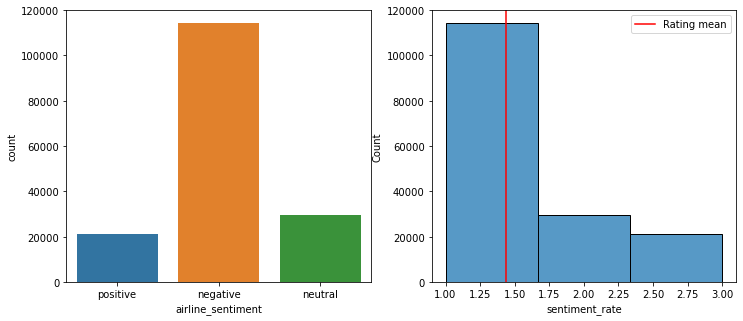

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x=df["airline_sentiment"], ax=ax1, label="Total Sentiment"); #busca como cambiar el orden de los cubos
sns.histplot(x=df["sentiment_rate"], bins = 3, ax=ax2); #A
plt.axvline (x = np.mean(df["sentiment_rate"]), c= "red", label="Rating mean")
#plt.axvline (x = np.percentile(df["sentiment_rate"], 25), c= "green")
#plt.axvline (x = np.percentile(df["sentiment_rate"], 75), c= "green")
plt.legend()


- How many reviews has every ariline
- What is the airline with more positive and negative reviews


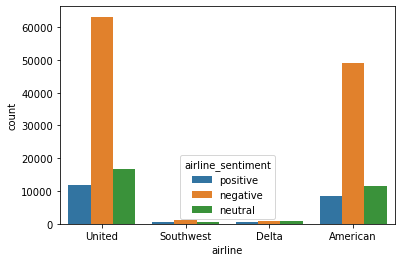

In [7]:
sns.countplot(x=df.airline, hue=df.airline_sentiment)

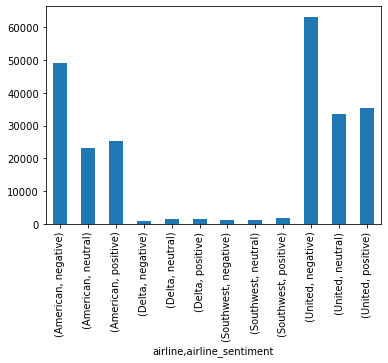

In [8]:
agg_sentiment = df.groupby(['airline', 'airline_sentiment'])#.mean().unstack().fillna(0)
#agg_sentiment.plot(kind='bar', stacked=True)

agg_sentiment.sum()["sentiment_rate"].plot(kind="bar", stacked=True)

- Do tweets with negative raiting get more retweets? 

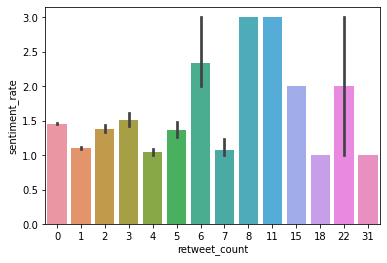

In [9]:
sns.barplot(x="retweet_count",
                y="sentiment_rate",
                data=df)

What are the negative reassons per airline?

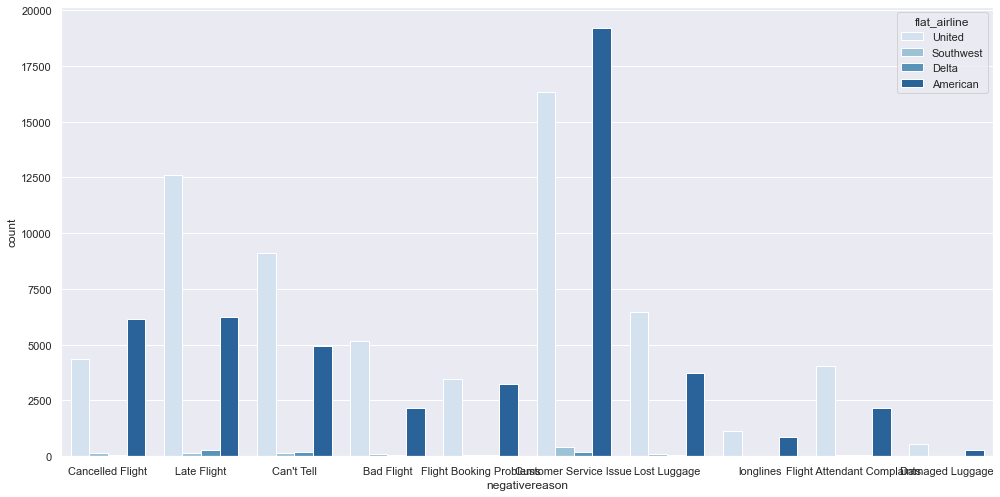

In [10]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
#esto se puede poner las etiquetas giradas
sns.countplot(x=df.negativereason,
              hue=df.flat_airline,
              palette="Blues")

Expectaction vs Reality.

Airline Rating VS sentiment_rate | airline_sentiment per airline

In [11]:
map_1 = folium.Map(location = [42.361016, -71.02000488], zoom_start= 5)


In [12]:
map_1 #

SyntaxError: invalid syntax (<ipython-input-13-34cdc1a487a6>, line 1)